<a href='#Imports&Raw Data'>Imports & Raw Data</a>
<a href='#EarlyExploration'>Early analysis and Exploration</a>

In [2]:
#<a id='Imports&Raw Data'></a>

#Imports & Raw Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
plt.style.use('fivethirtyeight')
plt_kwargs = {'figsize': (10, 6)}
%matplotlib inline

In [3]:
meets = pd.read_csv('meets.csv')

In [4]:
meets.head()

,MeetID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
1,1,365strong/1602,365Strong,2016-11-19,USA,MO,Ozark,Thanksgiving Powerlifting Classic
2,2,365strong/1603,365Strong,2016-07-09,USA,NC,Charlotte,Charlotte Europa Games
3,3,365strong/1604,365Strong,2016-06-11,USA,SC,Rock Hill,Carolina Cup Push Pull Challenge
4,4,365strong/1605,365Strong,2016-04-10,USA,SC,Rock Hill,Eastern USA Challenge


In [5]:
meets.shape

(8482, 8)

In [6]:
meets['Federation'].unique()

array(['365Strong', 'AAU', 'ADFPA', 'APA', 'APC', 'APF', 'WPC', 'AAPF',
       'CAPO', 'AsianPF', 'BB', 'BP', 'BPU', 'CommonwealthPF', 'CPF',
       'CPL', 'CPU', 'EPA', 'EPF', 'FESUPO', 'FFForce', 'FPO', 'GPA',
       'GPC', 'GPC-AUS', 'GPC-GB', 'HERC', 'IPA', 'IPF', 'IrishPF', 'MHP',
       'MM', 'NAPF', 'NASA', 'NIPF', 'NPA', 'NSF', 'NZPF', 'OceaniaPF',
       'PA', 'ProRaw', 'RAW', 'RPS', 'XPC', 'RUPC', 'ScottishPL', 'SCT',
       'SPF', 'THSPA', 'UPA', 'USAPL', 'USPF', 'USPA', 'IPL', 'WelshPA',
       'WNPF', 'WRPF', 'WRPF-AUS', 'WRPF-CAN', 'WUAP'], dtype=object)

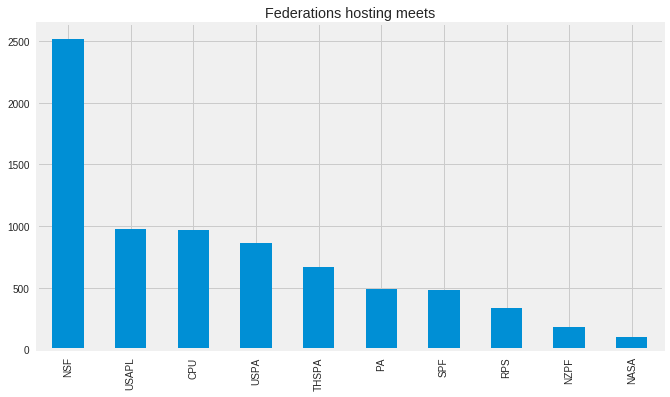

In [7]:
meets['Federation'].value_counts().head(10).plot.bar(
    title='Federations hosting meets', **plt_kwargs)

In [7]:
meets['Date'].head()

0    2016-10-29
1    2016-11-19
2    2016-07-09
3    2016-06-11
4    2016-04-10
Name: Date, dtype: object

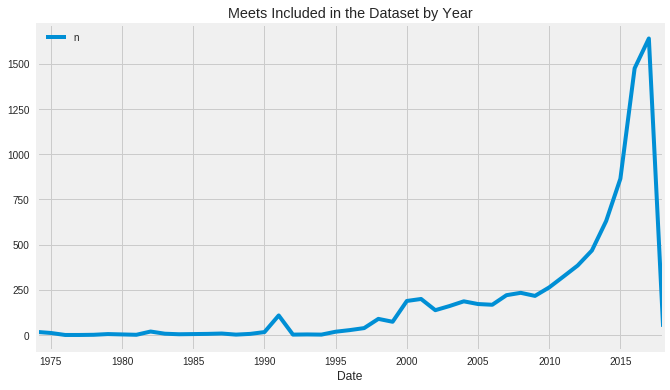

In [8]:
(pd.to_datetime(meets['Date'])
     .to_frame()
     .assign(n=0)
     .set_index('Date')
     .resample('AS')
     .count()
     #.plot.line(x = 1992) # equipment allowed
     .plot.line(title='Meets Included in the Dataset by Year', **plt_kwargs))

In [9]:
meets['MeetCountry'].value_counts()

USA                  3894
Norway               2521
Canada               1066
Australia             532
New Zealand           195
Russia                 43
N.Ireland              36
UK                     34
Ireland                21
England                16
Finland                16
Czechia                12
Spain                   8
South Africa            8
Serbia                  7
France                  6
Italy                   6
India                   5
Scotland                4
Estonia                 4
Ukraine                 4
Sweden                  4
US Virgin Islands       3
Belarus                 3
Poland                  3
Germany                 3
Colombia                3
Brazil                  3
Puerto Rico             2
Kazakhstan              2
Greece                  2
Denmark                 2
Luxembourg              2
Iceland                 1
New Caledonia           1
Japan                   1
Singapore               1
Peru                    1
Israel      

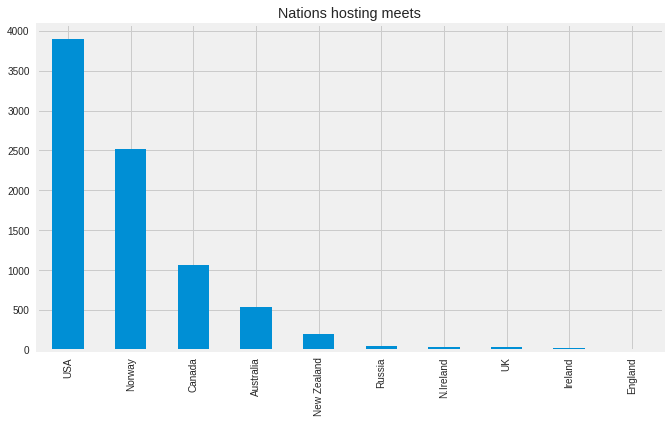

In [10]:
meets['MeetCountry'].value_counts().head(10).plot.bar(
    title='Nations hosting meets', **plt_kwargs)

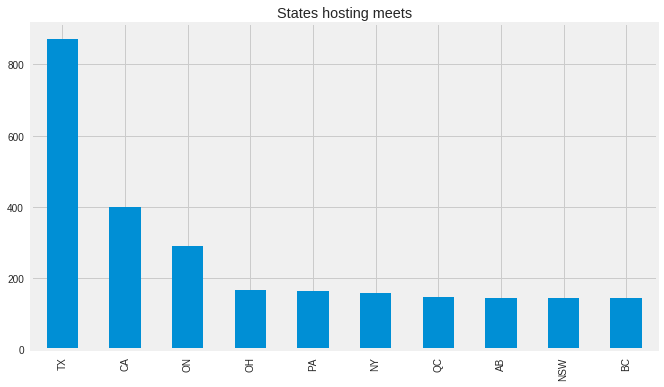

In [11]:
meets['MeetState'].value_counts().head(10).plot.bar(
    title='States hosting meets', **plt_kwargs)

In [8]:
meets['year'] = meets['Date'].str.split('-').str.get(0).astype(int)

In [13]:
meets['year'].dtype

dtype('int64')

In [14]:
meets[['year', 'MeetID']]

,year,MeetID
0,2016,0
1,2016,1
2,2016,2
3,2016,3
4,2016,4
5,2017,5
6,2017,6
7,2017,7
8,2017,8
9,2017,9


In [9]:
len(' '.join(meets['MeetName'].values))

202560

(-0.5, 399.5, 199.5, -0.5)

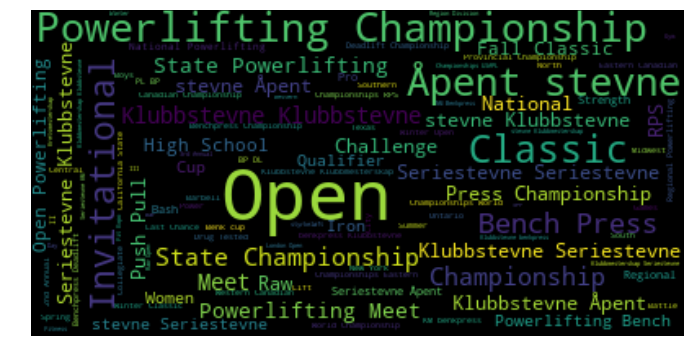

In [16]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(" ".join(meets['MeetName'].values))
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#Norwegian Words?

In [10]:
openPL = pd.read_csv('openpowerlifting.csv')

In [18]:
openPL.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


In [19]:
openPL.shape

(386414, 17)

In [20]:
openPL.describe()

,MeetID,Age,BodyweightKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Wilks
count,386414.000000,147147.000000,384012.000000,1243.000000,298071.000000,1962.000000,356364.000000,2800.000000,317847.000000,363237.000000,362194.000000
mean,5143.015804,31.668237,86.934912,107.036404,176.569941,45.722905,118.347509,113.597193,195.040633,424.000249,301.080601
std,2552.099838,12.900342,23.140843,166.976620,69.222785,151.668221,54.848850,170.201657,61.580675,196.355147,116.360396
min,0.000000,5.000000,15.880000,-440.500000,-477.500000,-360.000000,-522.500000,-461.000000,-410.000000,11.000000,13.730000
25%,2979.000000,22.000000,70.300000,87.500000,127.500000,-90.000000,79.380000,110.000000,147.500000,272.160000,237.380000
50%,5960.000000,28.000000,83.200000,145.000000,174.630000,90.250000,115.000000,157.500000,195.000000,424.110000,319.660000
75%,7175.000000,39.000000,100.000000,212.500000,217.720000,167.500000,150.000000,219.990000,238.140000,565.000000,379.290000
max,8481.000000,95.000000,242.400000,450.000000,573.790000,378.750000,488.500000,418.000000,460.400000,1365.310000,779.380000


In [21]:
openPL.loc[openPL['Age'] <= 17]

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
14,0,Danielle Ortiz,F,Raw,17.0,Teen 16-17,69.31,75,NaN,81.65,NaN,49.90,NaN,115.67,247.22,1,247.64
42,0,Jacob Hunt,M,Wraps,17.0,Teen 16-17,89.81,90,NaN,158.76,NaN,106.59,NaN,192.78,458.13,1,292.78
47,0,Jon Rand,M,Wraps,17.0,Teen 16-17,95.44,100,NaN,242.67,NaN,129.27,-226.80,226.80,598.74,1,371.66
60,0,Bryan Camhi,M,Wraps,17.0,Teen 16-17,120.66,125,NaN,215.46,NaN,149.69,NaN,102.06,467.21,1,268.27
80,1,LeighAnn Allen,F,Raw,17.0,T2,50.80,52,NaN,NaN,NaN,40.00,97.52,87.50,127.50,1,161.82
81,1,LeighAnn Allen,F,Raw,17.0,T2,50.80,52,NaN,NaN,NaN,40.00,NaN,NaN,40.00,1,50.77
88,1,Dayton Wade,M,Raw,17.0,T2,55.88,56,NaN,NaN,NaN,80.00,NaN,95.00,175.00,1,159.65
174,2,Jacob Hunt,M,Raw,17.0,M-T2FR-X,87.27,90,NaN,156.49,NaN,97.52,NaN,192.78,446.79,1,289.87
265,4,Austin Smith,M,Raw,15.0,T1,74.93,75,NaN,151.95,NaN,117.93,NaN,145.15,415.04,1,295.93
266,4,Eric Sassi,M,Raw,16.0,T2,63.59,67.5,NaN,NaN,NaN,95.25,NaN,127.01,222.26,1,180.06


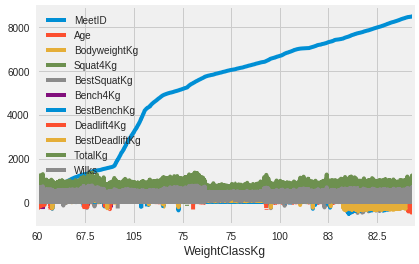

In [22]:
openPL.plot('WeightClassKg')

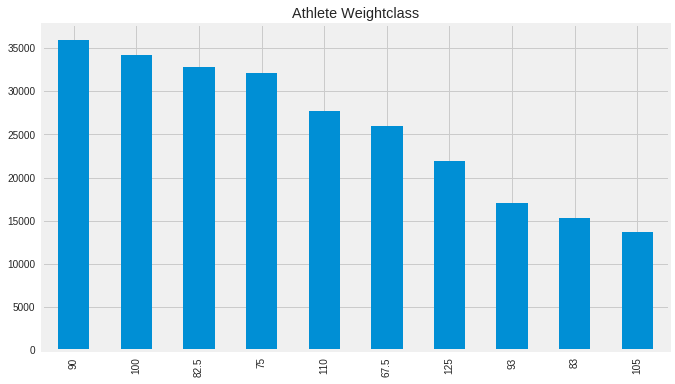

In [23]:
openPL['WeightClassKg'].value_counts().head(10).plot.bar(
    title='Athlete Weightclass', **plt_kwargs)

In [24]:
liftsM = openPL.query("Sex == 'M'")
liftsF = openPL.query("Sex == 'F'")

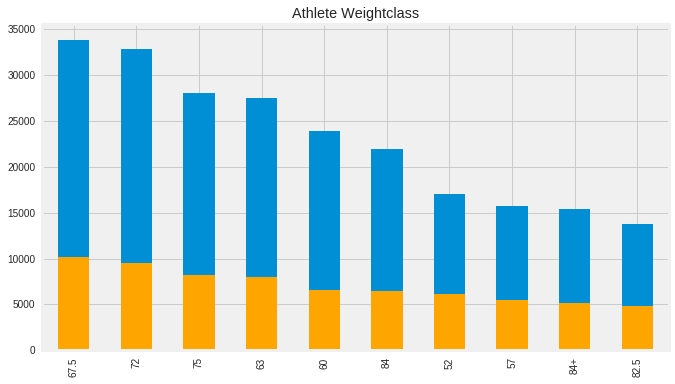

In [25]:
ax = liftsM['WeightClassKg'].value_counts().head(10).plot.bar(
    title='Athlete Weightclass', **plt_kwargs)
liftsF['WeightClassKg'].value_counts().head(10).plot.bar(color ='orange')
plt.show()

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


Text(0.5,0.98,'Athlete Age')

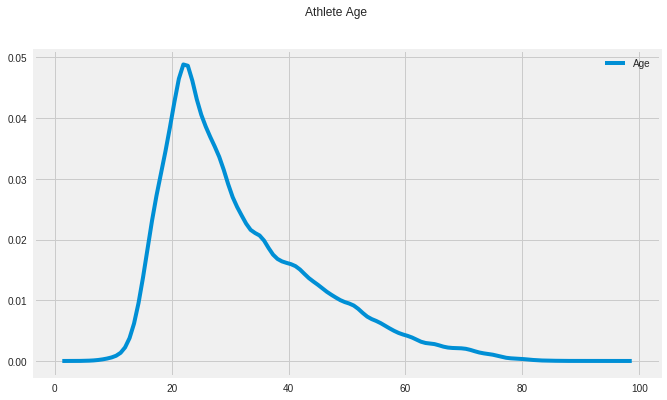

In [26]:
fig, ax = plt.subplots(1, figsize=(10, 6))
sns.kdeplot(openPL['Age'])
plt.suptitle("Athlete Age")

In [27]:
liftsF['WeightClassKg'].unique()

array(['60', '67.5', '75', '82.5', '90', '90+', '52', '56', '48', '100',
       '110', '35', '40', '44', nan, '39', '47', '57', '63', '72', '84',
       '84+', '43', '83', '93', '66', '59', '100+', '110+', '53', '80',
       '74', '105', '70', '70+', '75+', '117.5', '67.5+', '30', '60+',
       '34'], dtype=object)

Text(0,0.5,'N')

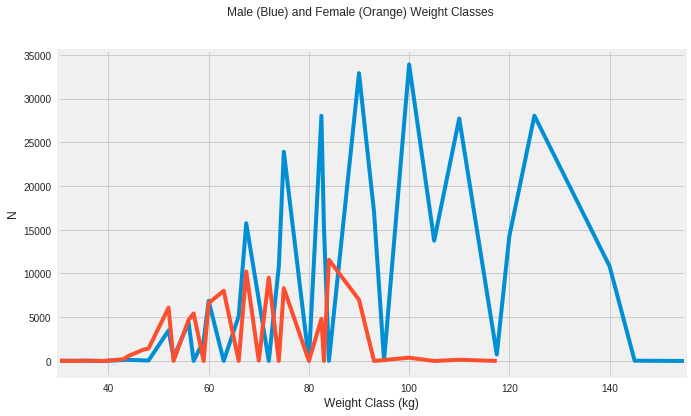

In [28]:
#Different meets have different rules and weightclasses. 75+ might be the top weightclass for one, and 70+ might be the top for another.
openPL.query('Sex == "M"')['WeightClassKg'].str.replace("+", "").astype(float).dropna().value_counts().sort_index().plot.line(**plt_kwargs)
openPL.query('Sex == "F"')['WeightClassKg'].str.replace("+", "").astype(float).dropna().value_counts().sort_index().plot.line()
plt.suptitle("Male (Blue) and Female (Orange) Weight Classes")
plt.gca().set_xlabel("Weight Class (kg)")
plt.gca().set_ylabel("N")

In [29]:
openPL.loc[openPL['MeetID'] == 1]

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
79,1,Maggie Parsons,F,Raw,20.0,Open,48.99,52,NaN,75.0,NaN,37.5,NaN,100.0,212.5,1,277.21
80,1,LeighAnn Allen,F,Raw,17.0,T2,50.80,52,NaN,NaN,NaN,40.0,97.52,87.5,127.5,1,161.82
81,1,LeighAnn Allen,F,Raw,17.0,T2,50.80,52,NaN,NaN,NaN,40.0,NaN,NaN,40.0,1,50.77
82,1,Paige Harrod,F,Raw,20.0,Open,65.09,67.5,NaN,NaN,NaN,62.5,NaN,142.5,205.0,1,214.85
83,1,Lisha Lamb,F,Raw,20.0,Open,71.30,75,NaN,127.5,NaN,62.5,NaN,135.0,325.0,1,319.29
84,1,Carley Bradshaw,F,Raw,20.0,Open,71.67,75,NaN,127.5,NaN,57.5,NaN,132.5,317.5,2,310.84
85,1,Chelsey Roberts,F,Raw,26.0,Novice,73.26,75,NaN,102.5,NaN,55.0,NaN,127.5,285.0,1,275.02
86,1,Christina McDowell,F,Multi-ply,46.0,M2,71.21,75,NaN,NaN,NaN,117.5,NaN,NaN,117.5,1,115.54
87,1,Natalie Mayfield,F,Wraps,38.0,Open,82.10,82.5,NaN,140.0,NaN,75.0,NaN,157.5,372.5,1,336.09
88,1,Dayton Wade,M,Raw,17.0,T2,55.88,56,NaN,NaN,NaN,80.0,NaN,95.0,175.0,1,159.65


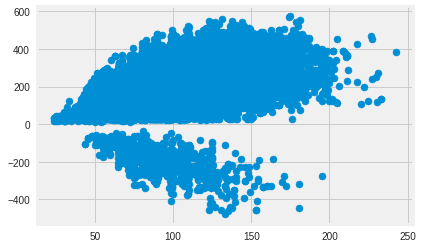

In [30]:
plt.scatter(openPL['BodyweightKg'], openPL['BestSquatKg']) #it is not possible to have a negative squat, they are recording missed attempts as negative.

In [31]:
#plt.bar(openPL['TotalKg'])
openPL.dtypes

MeetID              int64
Name               object
Sex                object
Equipment          object
Age               float64
Division           object
BodyweightKg      float64
WeightClassKg      object
Squat4Kg          float64
BestSquatKg       float64
Bench4Kg          float64
BestBenchKg       float64
Deadlift4Kg       float64
BestDeadliftKg    float64
TotalKg           float64
Place              object
Wilks             float64
dtype: object

In [11]:
print(openPL['MeetID'].min(), openPL['MeetID'].max())

0 8481


In [33]:
openPL.loc[openPL['Place'] == 'G']

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
229,2,Wayne VanNostrand,M,Raw,46.0,M-M2PR-X,132.18,140,NaN,NaN,NaN,260.82,NaN,272.16,532.97,G,300.57
3673,65,Janessa Peightal,F,Raw,12.0,F-O-R,49.00,52,NaN,67.5,NaN,42.50,NaN,75.00,185.00,G,241.30
3869,68,Katie Lyn Griffin,F,Wraps,12.0,F_OCR_WPC,75.20,82.5,NaN,80.0,NaN,45.00,NaN,100.00,225.00,G,213.54
8828,125,S. Tengko,M,Single-ply,NaN,NaN,92.30,100,NaN,150.0,NaN,130.00,NaN,210.00,490.00,G,308.93
9692,141,Gary Prater,M,Single-ply,NaN,M-E-M1,66.10,74,NaN,NaN,NaN,125.00,NaN,NaN,125.00,G,98.03
10245,148,Roger Little,M,Single-ply,NaN,M-M4,66.50,74,NaN,110.0,NaN,65.00,NaN,150.00,325.00,G,253.62
10703,154,Robert Rodney,M,Raw,NaN,M2,91.40,93,NaN,NaN,NaN,152.50,NaN,NaN,152.50,G,96.61
11053,159,Samantha Devlin,F,Raw,NaN,F-M2-Guest,57.90,63,NaN,95.0,NaN,55.00,NaN,110.00,260.00,G,298.03
13145,185,Michael Tuchscherer,M,Raw,NaN,Open,119.30,120,NaN,337.5,NaN,207.50,NaN,371.00,916.00,G,527.35
13240,188,Kimberly Walford,F,Raw,34.5,Open,65.45,72,NaN,167.5,NaN,100.00,NaN,232.50,500.00,G,521.88


In [34]:
openPL['Sex'].value_counts() / len(openPL)

M    0.773898
F    0.226102
Name: Sex, dtype: float64

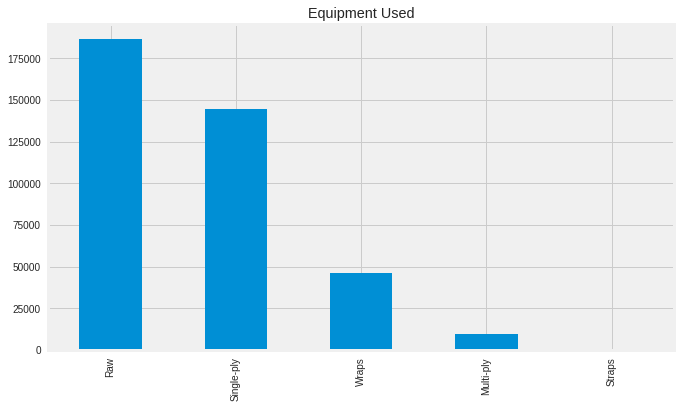

In [35]:
openPL['Equipment'].value_counts().plot.bar(**plt_kwargs, title='Equipment Used')

<<<<<<<<<<<<-----Human performance over time-------------->>>>>>>>>>>>>>>>

Wilks Coefficient - a devised score of measuring relative strength<br>

Coeff=500 / (a+bx+cx2+dx3+ex4+fx5)<br>
 
where: a=-216.0475144 | b=16.2606339 | c=-0.002388645 | d=-0.00113732 | e=7.01863E-06 | f=-1.291E-08

x = body weight of lifter in kg

The Coeff is then multiplied by their total lifts (bench + deadlift + squat) to give a Wilks Score

In [36]:
tmp = abs(liftsM[['Age', 'Wilks']].dropna())

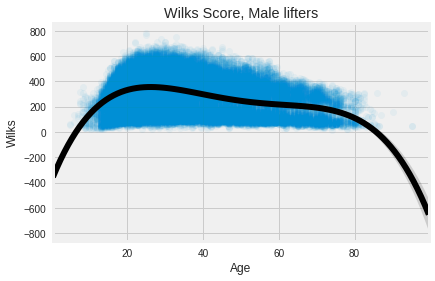

In [37]:
plt.figure()
sns.regplot(tmp['Age'], (tmp['Wilks']), order=4, scatter_kws={'alpha': 0.05}, line_kws={'color': 'black'})
plt.title('Wilks Score, Male lifters');

In [38]:
tfp = abs(liftsF[['Age', 'Wilks']].dropna())

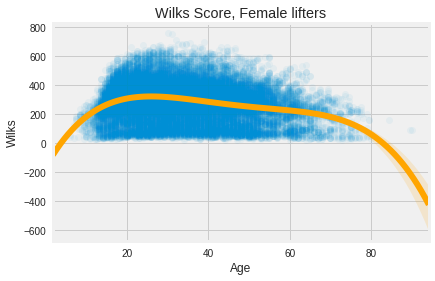

In [39]:
plt.figure()
sns.regplot(tfp['Age'], (tfp['Wilks']), order=4, scatter_kws={'alpha': 0.05}, line_kws={'color': 'orange'})
plt.title('Wilks Score, Female lifters');

(Text(0,0.5,'Best fit regression for lift, in kg'),
 <matplotlib.legend.Legend at 0x7f63f0104fd0>)

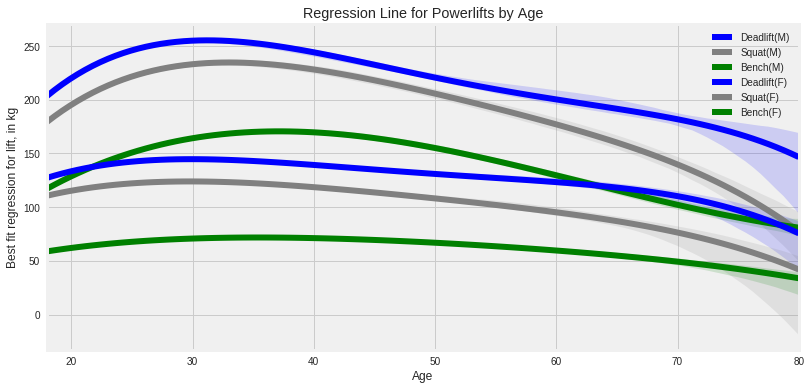

In [40]:
plt.figure(figsize=(12,6)), plt.xlim(18,80), plt.title('Regression Line for Powerlifts by Age')
tmp = abs(liftsM[['Age', 'BestDeadliftKg']].dropna().sample(5000))
sns.regplot(tmp['Age'], tmp['BestDeadliftKg'], order=4, scatter=False, color='blue', marker='o', label='Deadlift(M)')
tmp = abs(liftsM[['Age', 'BestSquatKg']].dropna().sample(5000))
sns.regplot(tmp['Age'], tmp['BestSquatKg'], order=4, scatter=False, color='grey', marker='o', label='Squat(M)')
tmp = abs(liftsM[['Age', 'BestBenchKg']].dropna().sample(5000))
sns.regplot(tmp['Age'], tmp['BestBenchKg'], order=4, scatter=False, color = 'green', marker='o', label='Bench(M)')

tfp = abs(liftsF[['Age', 'BestDeadliftKg']].dropna().sample(5000))
sns.regplot(tfp['Age'], tfp['BestDeadliftKg'], order=4, scatter=False, color='blue', marker='+', label='Deadlift(F)')
tfp = abs(liftsF[['Age', 'BestSquatKg']].dropna().sample(5000))
sns.regplot(tfp['Age'], tfp['BestSquatKg'], order=4, scatter=False, color='grey', marker='+', label='Squat(F)')
tfp = abs(liftsF[['Age', 'BestBenchKg']].dropna().sample(5000))
sns.regplot(tfp['Age'], tfp['BestBenchKg'], order=4, scatter=False, color='green', marker='+', label='Bench(F)')

plt.ylabel("Best fit regression for lift, in kg"), plt.legend()


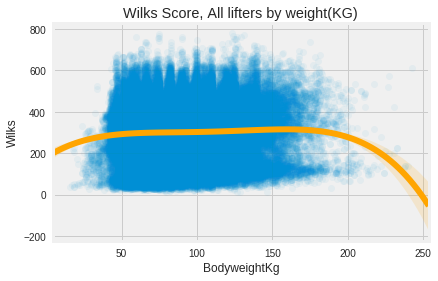

In [41]:
#sns.scatter(tmp[''])
plt.figure()
sns.regplot(openPL['BodyweightKg'], (openPL['Wilks']), order=4, scatter_kws={'alpha': 0.05}, line_kws={'color': 'orange'})
plt.title('Wilks Score, All lifters by weight(KG)');

In [42]:
openPL.values.nbytes #this feels like alot.

52552304

In [43]:
meets.query('MeetID ==6591')

,MeetID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName,year
6591,6591,usapl/CA-2017-07,USAPL,2017-04-29,USA,CA,NaN,2017 California State Championship,2017


In [44]:
openPL.count()

MeetID            386414
Name              386414
Sex               386414
Equipment         386414
Age               147147
Division          370571
BodyweightKg      384012
WeightClassKg     382602
Squat4Kg            1243
BestSquatKg       298071
Bench4Kg            1962
BestBenchKg       356364
Deadlift4Kg         2800
BestDeadliftKg    317847
TotalKg           363237
Place             385322
Wilks             362194
dtype: int64

In [45]:
openPL.query('MeetID == 2').count()

MeetID            92
Name              92
Sex               92
Equipment         92
Age               92
Division          92
BodyweightKg      92
WeightClassKg     92
Squat4Kg           0
BestSquatKg       54
Bench4Kg           0
BestBenchKg       83
Deadlift4Kg        1
BestDeadliftKg    72
TotalKg           90
Place             92
Wilks             90
dtype: int64

In [1]:
openPL.query('Place == "1"')

NameError: name 'openPL' is not defined

In [13]:

#meets['year'] = meets['Date'].str.split('-').str.get(0).astype(int)
meet_year = meets[['year', 'MeetID', 'Federation']]
merged = pd.merge(openPL, meet_year, on='MeetID')

In [14]:
print(merged.shape, meet_year.shape, openPL.shape, meets.shape)

(386414, 19) (8482, 3) (386414, 17) (8482, 9)


In [49]:
#merged.query('Place == "1"')

In [15]:
#HERE<><><><><>_-------------------<><><>
recent_1 = merged.query('year >= 2012')#| 'Place =="1"')
#recent_1 = recent_1.query('Place =="1"')
recent_1

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks,year,Federation
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05,2016,365Strong
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38,2016,365Strong
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38,2016,365Strong
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29,2016,365Strong
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47,2016,365Strong
5,0,Courtney Norris,F,Wraps,28.0,Open Senior,62.41,67.5,-183.7,170.10,NaN,77.11,NaN,145.15,392.36,1,424.40,2016,365Strong
6,0,Maureen Clary,F,Raw,60.0,Mst 60-64,67.31,67.5,NaN,124.74,NaN,95.25,NaN,163.29,383.28,1,391.98,2016,365Strong
7,0,Maureen Clary,F,Raw,60.0,Open Senior,67.31,67.5,NaN,124.74,NaN,95.25,NaN,163.29,383.28,1,391.98,2016,365Strong
8,0,Priscilla Sweat Pardue,F,Wraps,52.0,50-54,65.95,67.5,NaN,120.20,NaN,54.43,NaN,108.86,283.49,1,294.25,2016,365Strong
9,0,Priscilla Sweat Pardue,F,Raw,52.0,Senior,65.95,67.5,NaN,NaN,NaN,NaN,NaN,108.86,108.86,1,112.99,2016,365Strong


In [51]:
recent_1.shape #323036

(323036, 19)

In [52]:
recent_1['Wilks'].mean() #average wilks score after 2012

306.10871490348666

In [53]:
recent_1.groupby(['Division'], axis=0).mean()# Looks like I need to clean this badboy up a bit more.

,MeetID,Age,BodyweightKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Wilks,year
Division,,,,,,,,,,,,
-100kg,1292.000000,28.300000,96.820000,NaN,265.000000,NaN,178.750000,NaN,278.750000,722.500000,446.992500,2016.000000
11-12R,8442.000000,12.000000,92.500000,NaN,NaN,NaN,49.895000,NaN,94.120000,144.020000,92.635000,2016.000000
12*13,4891.400000,12.400000,55.268000,NaN,50.000000,NaN,50.833333,NaN,70.833333,83.000000,92.866000,2017.000000
12-13,4885.250000,12.750000,63.255000,NaN,25.000000,NaN,43.333333,NaN,70.000000,73.750000,78.162500,2016.500000
13-14R,8442.000000,13.000000,56.000000,NaN,81.650000,NaN,43.090000,NaN,92.990000,155.355000,141.425000,2016.000000
13-15,5671.909091,14.190476,75.807273,NaN,135.582308,NaN,83.295238,NaN,148.017647,274.003182,207.758182,2015.227273
13-15 Men,5649.000000,14.000000,62.870000,NaN,NaN,NaN,54.430000,NaN,NaN,54.430000,44.530000,2015.000000
13-15 Women,5649.000000,14.000000,55.380000,NaN,68.040000,NaN,36.290000,NaN,90.720000,115.665000,162.190000,2015.000000
14-15,4889.142857,14.428571,75.757143,NaN,71.000000,NaN,68.333333,NaN,103.333333,197.857143,160.481429,2016.857143


In [54]:
recent_1['Age'].isnull().value_counts()

True     186892
False    136144
Name: Age, dtype: int64

In [55]:
recent_1['Division'].isnull().value_counts()

False    312474
True      10562
Name: Division, dtype: int64

In [56]:
recent_1['Age'].isnull().sum()

186892

In [57]:
recent_1.loc[recent_1['Federation'] == 'NSF'].describe()

,MeetID,Age,BodyweightKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Wilks,year
count,11079.000000,0.0,11079.000000,0.0,7237.000000,0.0,10613.000000,0.0,7253.000000,10522.000000,10522.000000,11079.000000
mean,3079.976171,NaN,88.708309,NaN,168.758975,NaN,127.912447,NaN,189.082752,366.531905,258.070464,2014.377742
std,311.701868,NaN,21.004871,NaN,61.113109,NaN,54.399931,NaN,56.442458,203.698801,127.306205,1.608510
min,2540.000000,NaN,44.500000,NaN,25.000000,NaN,25.000000,NaN,30.000000,25.000000,28.530000,2012.000000
25%,2799.000000,NaN,72.665000,NaN,120.000000,NaN,85.000000,NaN,140.000000,190.000000,120.140000,2013.000000
50%,3104.000000,NaN,87.500000,NaN,165.000000,NaN,125.000000,NaN,190.000000,345.000000,289.010000,2014.000000
75%,3349.000000,NaN,102.740000,NaN,210.000000,NaN,162.500000,NaN,230.000000,530.000000,356.220000,2016.000000
max,3608.000000,NaN,192.100000,NaN,420.000000,NaN,353.000000,NaN,352.500000,1082.500000,618.690000,2017.000000


In [58]:
recent_1.loc[recent_1['Federation'] != 'NSF'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311957 entries, 0 to 386413
Data columns (total 19 columns):
MeetID            311957 non-null int64
Name              311957 non-null object
Sex               311957 non-null object
Equipment         311957 non-null object
Age               136144 non-null float64
Division          301395 non-null object
BodyweightKg      310309 non-null float64
WeightClassKg     308636 non-null object
Squat4Kg          1177 non-null float64
BestSquatKg       251805 non-null float64
Bench4Kg          1759 non-null float64
BestBenchKg       287592 non-null float64
Deadlift4Kg       2562 non-null float64
BestDeadliftKg    269063 non-null float64
TotalKg           293499 non-null float64
Place             311041 non-null object
Wilks             293115 non-null float64
year              311957 non-null int64
Federation        311957 non-null object
dtypes: float64(10), int64(2), object(7)
memory usage: 47.6+ MB


In [59]:
#I could attempt to pull null values in sex from division information. Worth investigating later
#Update: Not needed.
openPL.Sex.isnull().value_counts()

False    386414
Name: Sex, dtype: int64

In [16]:
recent_1['Sex'] = np.where(recent_1['Sex']=='M', '1', '0')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
recent_1['Sex'].value_counts()

1    245197
0     77839
Name: Sex, dtype: int64

Pseudo-code:
    If age is null, look at division, if it contains M it is masters. If it contains teen, it is teen.etc.

In [62]:
openPL.Age.isnull().sum()

239267

In [63]:
openPL.isnull().any()

MeetID            False
Name              False
Sex               False
Equipment         False
Age                True
Division           True
BodyweightKg       True
WeightClassKg      True
Squat4Kg           True
BestSquatKg        True
Bench4Kg           True
BestBenchKg        True
Deadlift4Kg        True
BestDeadliftKg     True
TotalKg            True
Place              True
Wilks              True
dtype: bool

In [64]:
missing_division = openPL[openPL.Division.isnull()]# might be okay to drop all of these
missing_division['Age'].isnull().sum()

6010

In [65]:
missing_division.shape

(15843, 17)

In [66]:
recent_1.dtypes

MeetID              int64
Name               object
Sex                object
Equipment          object
Age               float64
Division           object
BodyweightKg      float64
WeightClassKg      object
Squat4Kg          float64
BestSquatKg       float64
Bench4Kg          float64
BestBenchKg       float64
Deadlift4Kg       float64
BestDeadliftKg    float64
TotalKg           float64
Place              object
Wilks             float64
year                int64
Federation         object
dtype: object

In [17]:
recent_1['WeightClassKg'] = recent_1['WeightClassKg'].str.replace('+', '').astype(float)

recent_1['WeightClassKg'].isnull().sum()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


3321

In [68]:
recent_1.std()

MeetID            2460.039858
Age                 12.762773
BodyweightKg        23.296621
WeightClassKg       21.853320
Squat4Kg           168.671232
BestSquatKg         67.611227
Bench4Kg           152.346603
BestBenchKg         53.461781
Deadlift4Kg        174.986418
BestDeadliftKg      61.203175
TotalKg            188.165613
Wilks              109.043183
year                 1.397175
dtype: float64

In [18]:
recent_1['Name'].nunique()

119564

In [19]:
recent_1['Equipment'] = recent_1['Equipment'].astype('category')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
recent_1.dtypes

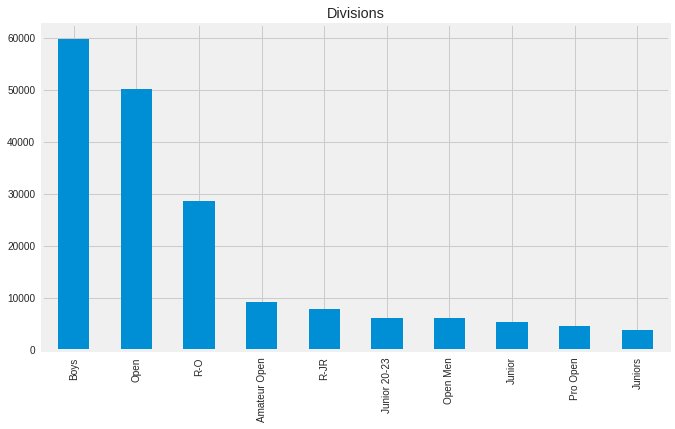

In [71]:
recent_1['Division'].value_counts().head(10).plot.bar(
    title='Divisions', **plt_kwargs)

In [ ]:
recent_1.info()

In [20]:
recent_1 = recent_1[np.isfinite(recent_1['BodyweightKg'])]

In [ ]:
recent_1.shape

In [73]:
recent_1[['TotalKg', 'Wilks', 'BestSquatKg', 'BestBenchKg', 'BestDeadliftKg']].shape

(321388, 5)

In [74]:
recent_1 = recent_1.dropna(subset = ['BestSquatKg', 'BestBenchKg', 'BestDeadliftKg'])#.shape

In [75]:
to_drop=[]
to_drop = ['Squat4Kg', 'Deadlift4Kg', 'Bench4Kg', 'WeightClassKg']
recent_1.drop(to_drop, axis=1, inplace=True)

In [76]:
recent_1.head(1)

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks,year,Federation
0,0,Angie Belk Terry,0,Wraps,47.0,Mst 45-49,59.6,47.63,20.41,70.31,138.35,1,155.05,2016,365Strong


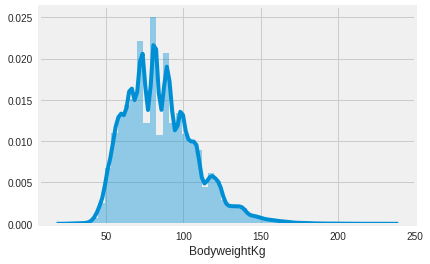

In [77]:
sns.distplot(recent_1['BodyweightKg'])

In [78]:
recent_1['Equipment'] = LabelEncoder().fit_transform(recent_1['Equipment'])
recent_1['AthID'] = LabelEncoder().fit_transform(recent_1['Name'])
#Isuspect that label encoder might be confused with athletes that have same names, for example. John smith and john smith Jr.

In [ ]:
recent_1.shape

In [79]:
recent_1=recent_1[np.isfinite(recent_1['Wilks'])]
recent_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248664 entries, 0 to 386383
Data columns (total 16 columns):
MeetID            248664 non-null int64
Name              248664 non-null object
Sex               248664 non-null object
Equipment         248664 non-null int64
Age               100843 non-null float64
Division          239512 non-null object
BodyweightKg      248664 non-null float64
BestSquatKg       248664 non-null float64
BestBenchKg       248664 non-null float64
BestDeadliftKg    248664 non-null float64
TotalKg           248664 non-null float64
Place             247980 non-null object
Wilks             248664 non-null float64
year              248664 non-null int64
Federation        248664 non-null object
AthID             248664 non-null int64
dtypes: float64(7), int64(4), object(5)
memory usage: 32.3+ MB


In [81]:
recent_1 =recent_1.query('AthID != 51443')
recent_1 = recent_1.drop('Federation', axis =1)
recent_1 = recent_1.drop('Name', axis=1)

In [82]:
recent_1.to_csv('recent_1.csv', index=False)

Text(0.5,0,'TotalKg')

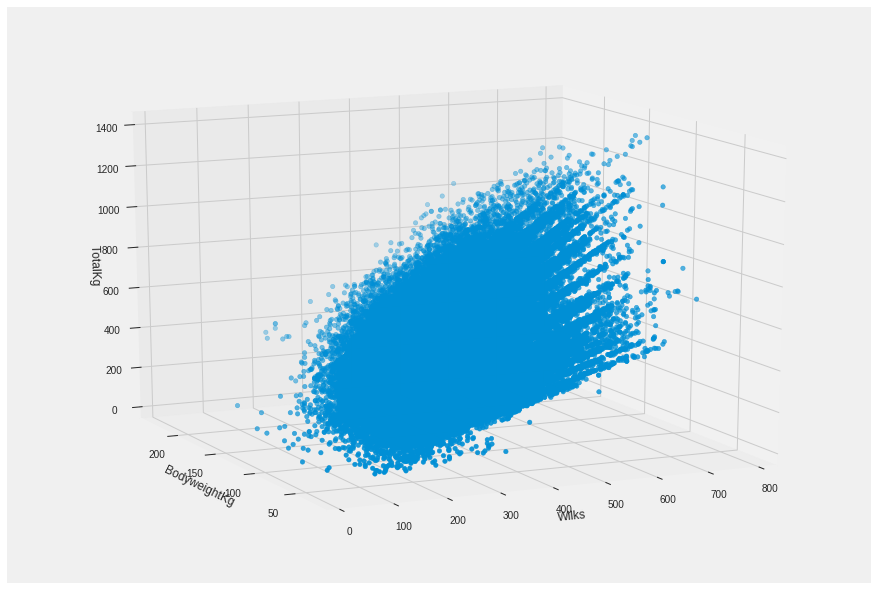

In [83]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)
ax.scatter(recent_1['Wilks'], recent_1['BodyweightKg'], recent_1['TotalKg'])
ax.set_xlabel('Wilks')
ax.set_ylabel('BodyweightKg')
ax.set_zlabel('TotalKg')


In [84]:
openPL.query('Name == "Eva Dunbar"') #used her because she set a new record last week

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
2768,59,Eva Dunbar,F,Raw,33.0,F_OR_WPC,67.00,67.5,NaN,182.50,NaN,110.00,NaN,222.5,515.00,1,528.44
13719,194,Eva Dunbar,F,Wraps,34.0,F-SmR,66.50,67.5,NaN,192.50,NaN,120.00,NaN,227.5,540.00,1,557.11
141736,5053,Eva Dunbar,F,Raw,NaN,Pro Open,66.50,67.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DQ,NaN
144431,5085,Eva Dunbar,F,Raw,NaN,Pro Open,66.50,67.5,NaN,192.50,NaN,122.50,NaN,230.0,545.00,1,562.27
386263,8481,Eva Dunbar,F,Wraps,NaN,Pro,67.49,67.5,NaN,215.46,NaN,129.27,NaN,233.6,578.33,1,590.32


<<<---An attempt at Competitive Learning, Cause winner take all!!--->>>

In [ ]:
# Import function to create training and test set splits
from sklearn.cross_validation import train_test_split
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures
# Import Linear Regression and a regularized regression function
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
# Finally, import function to make a machine learning pipeline
from sklearn.pipeline import make_pipeline

In [ ]:
recent_1.columns
features=[]
#we will predict Age in a later model!!!!
features = ['Equipment', 'BodyweightKg', 'year']
recent_1[features].head()

In [ ]:
recent_1['Equipment'].unique()

In [ ]:
recent_1['Equipment'] = recent_1['Equipment'].cat.codes
recent_1.head()

# This code is worth keeping, but I suspect that I will not use it in my final draft. It takes a few minor inputs and attempts to predict wilks score. It does not have any historical data regarding an athletes previous performance. This was written to be implemented after our time series lesson.

In [ ]:
# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=200
lasso_iter=20000
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 3
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(recent_1[features], recent_1['Wilks'],test_size=.5)

In [ ]:
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
for degree in range(degree_min,degree_max+1):
    model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter, normalize=True,cv=5))
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test,y_test)